In [1]:
library(data.table)       
library(dplyr)            
library(causalTree)       
library(grf)              
library(randomForest)     
library(uplift)           
library(caret)            
library(glmnet)

Warning message:
"package 'data.table' was built under R version 4.4.2"

Attaching package: 'dplyr'


The following objects are masked from 'package:data.table':

    between, first, last


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: rpart

Loading required package: rpart.plot

Warning message:
"package 'grf' was built under R version 4.4.2"
Warning message:
"package 'randomForest' was built under R version 4.4.2"
randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine


Warning message:
"package 'uplift' was built under R version 4.4.2"
Loading required package: RItools

Warning message:
"package 'RItools' was built under R version 4.4.2"
Loading required package: ggplot2


Attaching package: 'ggplot2'


The follo

In [2]:
df <- read.csv("cleaned_cgrd_data_no_negatives.csv")
mydata1=df[which(df$bloc=='1'),]
names(mydata1)
mydata1=as.data.frame(mydata1)
head(mydata1)

[1] "bloc"                                      
 [2] "icustayid"                                 
 [3] "charttime"                                 
 [4] "gender"                                    
 [5] "age"                                       
 [6] "elixhauser"                                
 [7] "re_admission"                              
 [8] "died_in_hosp"                              
 [9] "died_within_48h_of_out_time"               
[10] "mortality_90d"                             
[11] "delay_end_of_record_and_discharge_or_death"
[12] "Weight_kg"                                 
[13] "GCS"                                       
[14] "HR"                                        
[15] "SysBP"                                     
[16] "MeanBP"                                    
[17] "DiaBP"                                     
[18] "RR"                                        
[19] "SpO2"                                      
[20] "Temp_C"                                    
[21] "FiO2_1"                                    
[22] "Potassium"                                 
[23] "Sodium"                                    
[24] "Chloride"                                  
[25] "Glucose"                                   
[26] "BUN"                                       
[27] "Creatinine"                                
[28] "Magnesium"                                 
[29] "Calcium"                                   
[30] "Ionised_Ca"                                
[31] "CO2_mEqL"                                  
[32] "SGOT"                                      
[33] "SGPT"                                      
[34] "Total_bili"                                
[35] "Albumin"                                   
[36] "Hb"                                        
[37] "WBC_count"                                 
[38] "Platelets_count"                           
[39] "PTT"                                       
[40] "PT"                                        
[41] "INR"                                       
[42] "Arterial_pH"                               
[43] "paO2"                                      
[44] "paCO2"                                     
[45] "Arterial_BE"                               
[46] "Arterial_lactate"                          
[47] "HCO3"                                      
[48] "mechvent"                                  
[49] "Shock_Index"                               
[50] "PaO2_FiO2"                                 
[51] "median_dose_vaso"                          
[52] "max_dose_vaso"                             
[53] "input_total"                               
[54] "input_4hourly"                             
[55] "output_total"                              
[56] "output_4hourly"                            
[57] "cumulated_balance"                         
[58] "SOFA"                                      
[59] "SIRS"

,bloc,icustayid,charttime,gender,age,elixhauser,re_admission,died_in_hosp,died_within_48h_of_out_time,mortality_90d,⋯,PaO2_FiO2,median_dose_vaso,max_dose_vaso,input_total,input_4hourly,output_total,output_4hourly,cumulated_balance,SOFA,SIRS
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,1,1,1248165120,1,80,0,0,1,0,0,⋯,0.000,0,0,0.000,0,0.0,0,0,0,1
21,1,2,1503618780,0,53,0,0,1,0,0,⋯,0.000,0,0,1727.900,0,0.0,0,0,2,2
41,1,3,1503906600,0,72,0,0,1,0,0,⋯,498.295,0,0,1175.133,16,9122.6,0,16,11,1
61,1,4,1288328820,0,69,0,0,0,0,0,⋯,711.655,0,0,2087.550,16,0.0,0,16,7,2
81,1,5,1422507060,1,67,0,0,0,0,0,⋯,711.655,0,0,17215.100,16,0.0,0,16,5,1
101,1,6,1448674080,1,51,0,0,0,0,0,⋯,711.655,0,0,114000.000,40,0.0,0,2000,5,0


In [3]:
mydata=mydata1[c('icustayid',
                 'died_in_hosp',
                 'gender',
                 'age',
                 'Weight_kg',
                 'GCS',
                 'HR',
                 'SysBP',
                 'MeanBP',
                 'DiaBP',
                 'RR',
                 'SpO2',
                 'Temp_C',
                 'FiO2_1',
                 'Potassium',
                 'Sodium',
                 'Chloride',
                 'Glucose',
                 'BUN',
                 'Creatinine',
                 'Magnesium',
                 'Calcium',
                 'Ionised_Ca',
                 'CO2_mEqL',
                 'SGOT',
                 'SGPT',
                 'Total_bili',
                 'Albumin',
                 'Hb',
                 'WBC_count',
                 'Platelets_count',
                 'PTT',
                 'PT',
                 'INR',
                 'Arterial_pH',
                 'paO2',
                 'paCO2',
                 'Arterial_BE',
                 'HCO3',
                 'Arterial_lactate',
                 'mechvent',
                 'Shock_Index',
                 'PaO2_FiO2',
                 'median_dose_vaso',
                 'max_dose_vaso',
                 'input_total',
                 'input_4hourly',
                 'output_total',
                 'output_4hourly',
                 'cumulated_balance',
                 'SOFA',
                 'SIRS')]

In [4]:
median(mydata$input_4hourly)
mydata$A1=ifelse(mydata$input_4hourly>=median(mydata$input_4hourly),1,0)
mydata$A1
mydata=as.data.frame(mydata)

[1] 44

[1] 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
  [38] 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1
  [75] 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1
 [112] 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1
 [149] 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0
 [186] 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1
 [223] 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0
 [260] 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0
 [297] 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1
 [334] 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0
 [371] 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0
 [408] 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1
 [445] 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0
 [482] 1 0 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0
 [519] 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0
 [556] 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 [593] 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0
 [630] 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1
 [667] 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0
 [704] 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0
 [741] 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1
 [778] 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0
 [815] 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1
 [852] 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1
 [889] 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0
 [926] 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [963] 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1
[1000] 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
[1037] 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0
[1074] 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1
[1111] 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1
[1148] 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0
[1185] 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0
[1222] 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
[1259] 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0
[1296] 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
[1333] 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
[1370] 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1
[1407] 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1
[1444] 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0
[1481] 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0
[1518] 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1
[1555] 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1
[1592] 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0
[1629] 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1666] 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 1 0
[1703] 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1
[1740] 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1
[1777] 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1
[1814] 0 0 0 0 0 0 0 1 1 1 0 0 0 1

In [5]:
# Assuming dataset has 'treatment', 'outcome', and covariates
treatment_col <- "A1" 
outcome_col <- "died_in_hosp"      
covariate_cols <- c('gender',
                    'age',
                    'Weight_kg',
                    'GCS',
                    'HR',
                    'SysBP',
                    'MeanBP',
                    'DiaBP',
                    'RR',
                    'SpO2',
                    'Temp_C',
                    'FiO2_1',
                    'Potassium',
                    'Sodium',
                    'Chloride',
                    'Glucose',
                    'BUN',
                    'Creatinine',
                    'Magnesium',
                    'Calcium',
                    'CO2_mEqL',
                    'SGOT',
                    'SGPT',
                    'Total_bili',
                    'Albumin',
                    'Hb',
                    'WBC_count',
                    'Platelets_count',
                    'PTT',
                    'PT',
                    'INR',
                    'Arterial_pH',
                    'paO2',
                    'paCO2',
                    'Arterial_BE',
                    'HCO3',
                    'Arterial_lactate',
                    'mechvent',
                    'Shock_Index',
                    'PaO2_FiO2')

In [6]:
# Separate covariates (X), treatment (T), and outcome (Y)
X <- mydata[,c(covariate_cols)]
X

T <- mydata[[treatment_col]]
T

Y <- mydata[[outcome_col]]
Y

,gender,age,Weight_kg,GCS,HR,SysBP,MeanBP,DiaBP,RR,SpO2,⋯,INR,Arterial_pH,paO2,paCO2,Arterial_BE,HCO3,Arterial_lactate,mechvent,Shock_Index,PaO2_FiO2
,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,1,80,53.50000,0,72.71429,129.85714,89.47619,69.28571,20.00000,97.50000,⋯,0.00,7.4095,0.00,0.0,0.000,22.60,0.000,0,0.5599560,0.0000
21,0,53,51.00000,15,96.25000,91.75000,70.75000,60.25000,21.00000,96.75000,⋯,0.00,7.4560,0.00,0.0,1.950,36.30,0.000,1,1.0490463,0.0000
41,0,72,54.30000,8,99.42857,148.58333,100.13889,75.91667,20.66667,98.00000,⋯,1.20,7.4730,24914.75,30.5,3.600,16.30,275.427,0,0.6691771,498.2950
61,0,69,48.20000,6,102.60000,57.25000,61.33333,27.12500,29.00000,82.00000,⋯,1.70,7.1480,71165.50,36.7,7.600,36.50,275.427,0,1.1904762,711.6550
81,1,67,64.40000,15,106.00000,135.00000,92.00000,70.50000,22.50000,82.00000,⋯,1.20,7.4270,71165.50,36.7,2.250,36.50,125.442,0,0.7851852,711.6550
101,1,51,58.10000,6,64.25000,131.25000,98.75000,82.50000,20.66667,82.00000,⋯,1.40,7.5500,71165.50,40.2,13.500,36.50,883.548,0,0.4895238,711.6550
121,1,63,59.70000,6,102.00000,77.22222,56.92593,46.77778,18.00000,82.00000,⋯,2.30,7.3050,24903.50,41.2,7.450,30.00,883.548,1,1.3208633,249.0350
122,0,60,52.80000,6,106.50000,124.00000,91.88889,75.83333,18.00000,82.00000,⋯,2.30,7.3050,24903.50,41.2,7.450,30.00,883.548,1,0.8588710,249.0350
142,1,48,61.60000,9,75.71429,136.63636,94.93939,74.09091,24.66667,90.66667,⋯,1.20,7.4900,30266.12,29.1,4.200,22.60,883.548,1,0.5541298,465.6327


[1] 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
  [38] 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1
  [75] 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1
 [112] 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1
 [149] 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0
 [186] 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1
 [223] 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0
 [260] 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0
 [297] 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1
 [334] 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0
 [371] 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0
 [408] 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1
 [445] 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0
 [482] 1 0 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0
 [519] 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0
 [556] 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 [593] 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0
 [630] 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1
 [667] 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0
 [704] 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0
 [741] 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1
 [778] 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0
 [815] 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1
 [852] 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1
 [889] 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0
 [926] 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [963] 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1
[1000] 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
[1037] 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0
[1074] 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1
[1111] 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1
[1148] 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0
[1185] 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0
[1222] 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
[1259] 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0
[1296] 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
[1333] 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
[1370] 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1
[1407] 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1
[1444] 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0
[1481] 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0
[1518] 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1
[1555] 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1
[1592] 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0
[1629] 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1666] 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 1 0
[1703] 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1
[1740] 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1
[1777] 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1
[1814] 0 0 0 0 0 0 0 1 1 1 0 0 0 1

[1] 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0
  [38] 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [75] 0 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0
 [112] 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1
 [149] 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1
 [186] 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0
 [223] 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0
 [260] 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0
 [297] 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0
 [334] 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1
 [371] 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0
 [408] 1 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0
 [445] 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0
 [482] 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1
 [519] 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1
 [556] 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1
 [593] 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1
 [630] 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 [667] 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1
 [704] 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0
 [741] 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0
 [778] 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1
 [815] 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 [852] 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 [889] 0 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1
 [926] 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0
 [963] 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1
[1000] 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
[1037] 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0
[1074] 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0
[1111] 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1
[1148] 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0
[1185] 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0
[1222] 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0
[1259] 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1
[1296] 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0
[1333] 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1
[1370] 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1
[1407] 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1
[1444] 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
[1481] 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1
[1518] 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1
[1555] 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0
[1592] 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
[1629] 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1
[1666] 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 0
[1703] 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1
[1740] 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0
[1777] 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1
[1814] 0 0 0 1 0 1 1 0 0 1 0 0 0 0

In [7]:
# Standardize the covariates
preprocess <- preProcess(X, method = c("center", "scale"))
X <- predict(preprocess, X)

In [8]:
# Split into training and test sets
set.seed(42)
trainIndex <- createDataPartition(Y, p = 0.8, list = FALSE)
X_train <- X[trainIndex, ]
X_test <- X[-trainIndex, ]
T_train <- T[trainIndex]
T_test <- T[-trainIndex]
Y_train <- Y[trainIndex]
Y_test <- Y[-trainIndex]

In [9]:
## T-Learner (Using causalTree)
# Prepare training data (combine covariates, treatment, and outcome)
train_data <- data.frame(X_train, treatment = as.numeric(T_train), outcome = Y_train)

# Train causalTree for the treated group
tree_treat <- causalTree(
  formula = outcome ~ ., 
  data = train_data[, !(names(train_data) %in% c("treatment"))], # Exclude 'treatment' as a covariate
  treatment = train_data$treatment == 1,
  split.Rule = "CT", 
  split.Honest = TRUE, 
  cv.option = "CT", 
  minsize = 20
)

# Train causalTree for the control group
tree_control <- causalTree(
  formula = outcome ~ ., 
  data = train_data[, !(names(train_data) %in% c("treatment"))], # Exclude 'treatment' as a covariate
  treatment = train_data$treatment == 0,
  split.Rule = "CT", 
  split.Honest = TRUE, 
  cv.option = "CT", 
  minsize = 20
)

# Predict outcomes for test data
pred_treat <- predict(tree_treat, newdata = X_test)  # Predicted outcomes if treated
pred_control <- predict(tree_control, newdata = X_test)  # Predicted outcomes if not treated

# Estimate Individual Treatment Effect (ITE)
ITE <- pred_treat - pred_control
ITE
treatment_effects_t <-ITE

# Estimate Average Treatment Effect (ATE)
ATE <- mean(ITE)

# Print ATE
print(ATE)

[1] 2
[1] "CT"
[1] 2
[1] "CT"


81         101         195         215         295         355 
 1.06464646  0.84615385  0.04761905  1.24210526  0.71818182 -0.40000000 
        375         515         535         675         840         960 
 0.23188406 -0.46868687 -0.20434783  0.82413793  0.10897436 -0.61283644 
        980        1040        1260        1340        1427        1615 
-0.67058824 -0.98809524  0.82413793 -1.47428571 -0.53781513  0.12190476 
       1635        1869        2029        2218        2358        2438 
 1.16908213 -0.56221198 -0.44173913  0.02597403 -0.29150579  1.06464646 
       2528        2651        2711        2731        2751        2891 
 0.71818182  1.20000000  0.57142857  0.94930876  0.94930876  0.20289855 
       2991        3171        3211        3271        3291        3311 
-0.47941176  0.57142857  1.16908213  0.56969697  0.08333333 -0.29150579 
       3351        3411        3431        3491        3591        3658 
 0.56969697 -0.46376812 -0.47941176  0.94930876  1.15804598  1.15151515 
       3698        3928        3988        4070        4191        4251 
 0.57142857 -0.32887490  0.71212121 -0.62962963 -0.25862069 -0.69777778 
       4311        4331        4411        4471        4703        4723 
 0.21114865  1.24210526 -0.07936508  1.20000000 -0.81111111  0.27192118 
       4788        4828        4900        5001        5021        5255 
-0.80000000  0.57142857  0.00000000  0.80350877  0.82413793  0.71212121 
       5275        5362        5382        5462        5800        5986 
 0.71212121 -0.11428571 -0.75428571  0.23188406  0.71818182  1.06464646 
       6006        6046        6086        6226        6246        6326 
 1.34193548 -0.32887490 -1.54545455 -0.07936508 -0.62962963  0.80350877 
       6566        6586        6626        6706        6766        6786 
-0.36231884 -0.94623656  0.83333333 -0.88095238  0.35416667  0.35416667 
       6966        7067        7464        7572        7592        7612 
-0.28695652  1.06464646  0.84615385  0.00000000  0.97177419  0.03118908 
       7672        7712        7825        7885        8005        8245 
-0.28571429 -0.53781513  0.42307692 -0.39260313 -0.80000000 -0.98809524 
       8285        8418        8538        8646        8716        8976 
 0.23188406  0.23376623  0.76923077  0.47428571  0.60410557 -0.48060345 
       9241        9261        9423        9500        9717        9821 
 0.03118908 -0.32887490  0.50000000 -0.88095238 -0.13984462 -0.17598344 
       9841        9949       10069       10109       10129       10209 
-1.09803922  0.71818182  0.66666667  0.98168498 -0.53781513 -1.47428571 
      10449       10469       10509       10627       10782       10802 
 0.79115479  0.79115479 -0.90482888  0.95731707 -0.76623377  0.04761905 
      10882       10902       10962       11002       11063       11103 
 0.04768583  0.23376623  1.34193548 -0.28695652 -0.76068376  0.08333333 
      11123       11322       11402       11519       11659       11839 
-0.81111111 -0.76623377  0.02597403  0.27130435  0.12121212 -0.46376812 
      11939       11979       12147       12167       12467       12760 
-0.81111111 -0.76623377  0.92413793 -0.28695652  0.42307692 -0.28571429 
      12840       12880       13060       13200       13260       13520 
 0.23188406  1.34199134 -0.76623377 -0.48060345  0.27192118 -0.88095238 
      13743       13763       13783       13843       13903       13972 
-0.28571429 -0.53781513 -0.32887490  1.34199134 -0.90540541  1.16908213 
      13992       14015       14035       14349       14409       14449 
-1.31157895 -0.17857143  0.27192118 -0.28695652 -0.38624339  0.90043290 
      14529       14609       14711       14771       14898       14918 
-0.38624339 -0.39260313 -0.90482888  0.97177419  0.02597403  0.97272727 
      15211       15251       15592       15776       15796       15876 
-0.71238095  0.50216450  0.42307692  0.57142857 -0.47941176 -0.28695652 
      15896       15956       15996       16098       16178       1

[1] 0.04225567


In [10]:
# S-Learner (Single Model)
# Prepare training data with treatment included
X_train_augmented <- cbind(X_train, treatment = as.numeric(T_train))

# Train the S-Learner model
s_model <- glmnet(as.matrix(X_train_augmented), Y_train, alpha = 0)

# Predict for X_test under treatment (T=1)
X_test_treated <- cbind(X_test, treatment = 1)  # Add treatment column with T=1
pred_s_1 <- predict(s_model, as.matrix(X_test_treated), type = "response", s = 0.01)

# Predict for X_test under no treatment (T=0)
X_test_control <- cbind(X_test, treatment = 0)  # Add treatment column with T=0
pred_s_0 <- predict(s_model, as.matrix(X_test_control), type = "response", s = 0.01)

# Calculate Individual Treatment Effects (ITE)
treatment_effects_s <- pred_s_1 - pred_s_0

# Print the first few treatment effects
print(head(treatment_effects_s))

            s1
81  0.01858591
101 0.01858591
195 0.01858591
215 0.01858591
295 0.01858591
355 0.01858591


In [11]:
# R-Learner (Using grf)
r_forest <- causal_forest(X_train, Y_train, T_train)
treatment_effects_r <- predict(r_forest, X_test)$predictions

In [12]:
# Uplift Random Forest (Using uplift package)
train_data <- data.frame(X_train, treatment = as.numeric(T_train), outcome = Y_train)

# Train the uplift Random Forest model
uplift_model <- upliftRF(
  formula = outcome ~ . + trt(treatment),  # Use trt() for the treatment variable
  data = train_data,                      # Combined dataset with treatment, outcome, and covariates
  ntree = 100,                            # Number of trees
  split_method = "KL"                     # Kullback-Leibler divergence splitting
)

test_data <- data.frame(X_test, treatment = as.numeric(T_test), outcome = Y_test)
uplift_preds <- predict(uplift_model, newdata = test_data)


# Covariates used for training (excluding treatment and outcome)
covariate_cols <- setdiff(names(train_data), c("treatment", "outcome"))

# Check for missing or mismatched columns in X_test
missing_cols <- setdiff(covariate_cols, names(X_test))
extra_cols <- setdiff(names(X_test), covariate_cols)

treatment_effects_uplift <- uplift_preds[, 2] - uplift_preds[, 1]  # Difference between treated and control

In [13]:
# Compare Treatment Effects
results <- data.frame(
  T_Learner = treatment_effects_t,
  S_Learner = treatment_effects_s,
  R_Learner = treatment_effects_r,
  Uplift_RF = treatment_effects_uplift
)

# Print Results
print("First 5 Treatment Effect Estimates:")
print(head(results, 5))

[1] "First 5 Treatment Effect Estimates:"
     T_Learner         s1  R_Learner Uplift_RF
81  1.06464646 0.01858591 0.02955019  0.062061
101 0.84615385 0.01858591 0.02338779 -0.032834
195 0.04761905 0.01858591 0.02071242 -0.053702
215 1.24210526 0.01858591 0.01978661 -0.036794
295 0.71818182 0.01858591 0.02242069 -0.024922


In [14]:
# Average Treatment Effect (ATE) comparison
ATE_TLearner <- mean(treatment_effects_t)
ATE_SLearner <- mean(treatment_effects_s)
ATE_RLearner <- mean(treatment_effects_r)
ATE_uplift <- mean(treatment_effects_uplift)

cat("ATE for T-Learner: ", ATE_TLearner, "\n")
cat("ATE for S-Learner: ", ATE_SLearner, "\n")
cat("ATE for R-Learner: ", ATE_RLearner, "\n")
cat("ATE for Uplift RF: ", ATE_uplift, "\n")

ATE for T-Learner:  0.04225567 
ATE for S-Learner:  0.01858591 
ATE for R-Learner:  0.02004989 
ATE for Uplift RF:  -0.02522 


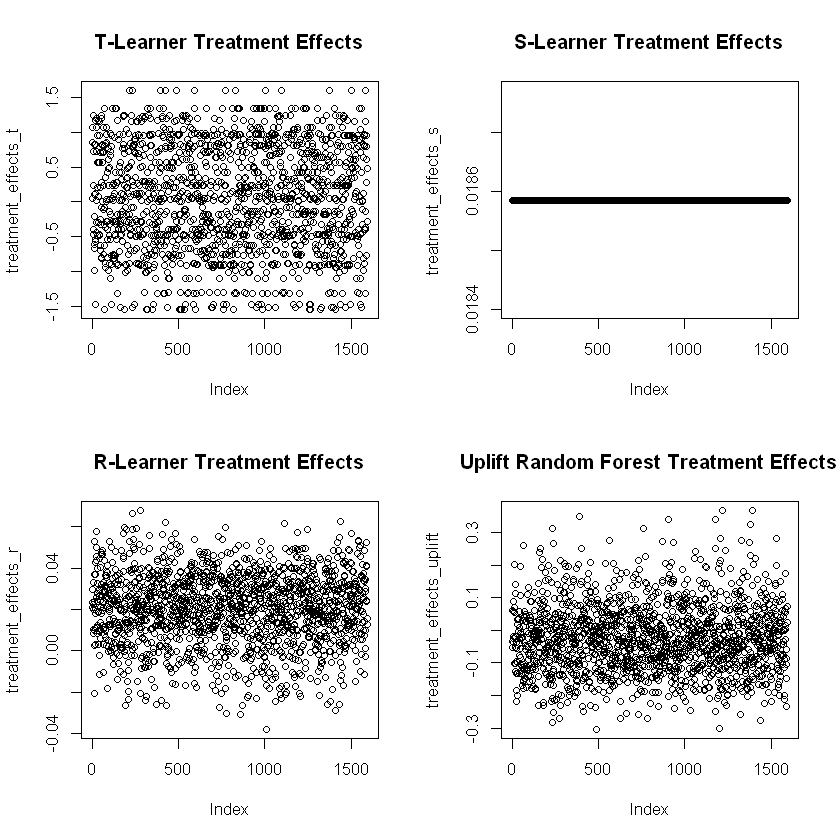

In [15]:
# Visualize Treatment Effects for each model
par(mfrow = c(2, 2))
plot(treatment_effects_t, main = "T-Learner Treatment Effects")
plot(treatment_effects_s, main = "S-Learner Treatment Effects")
plot(treatment_effects_r, main = "R-Learner Treatment Effects")
plot(treatment_effects_uplift, main = "Uplift Random Forest Treatment Effects")